In [2]:
#Read the Dataset

import pandas as pd

file = '/content/drive/MyDrive/Data Science Data Challenge/CHAMPS(Processed).csv'
data = pd.read_csv(file)

data.head()

,packet_version_id,id_ver_nmb,Champs_ID (Mortality),dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [4]:
#Step 1: Calculate the frequency
cause_counts = data['Condition'].value_counts()

In [5]:
#Step 2: Sort the causes based on their frequency in descending order
sorted_causes = cause_counts.sort_values(ascending=False)

In [6]:
#Step 3: Select the top three causes
top_three_causes = sorted_causes.head(3)

# Print the top three causes
print("Top Three Causes of Child Death:")
print(top_three_causes)

Top Three Causes of Child Death:
Condition
Intrauterine hypoxia    148
Birth asphyxia           33
Undetermined             28
Name: count, dtype: int64


Top Three Causes of the child Death

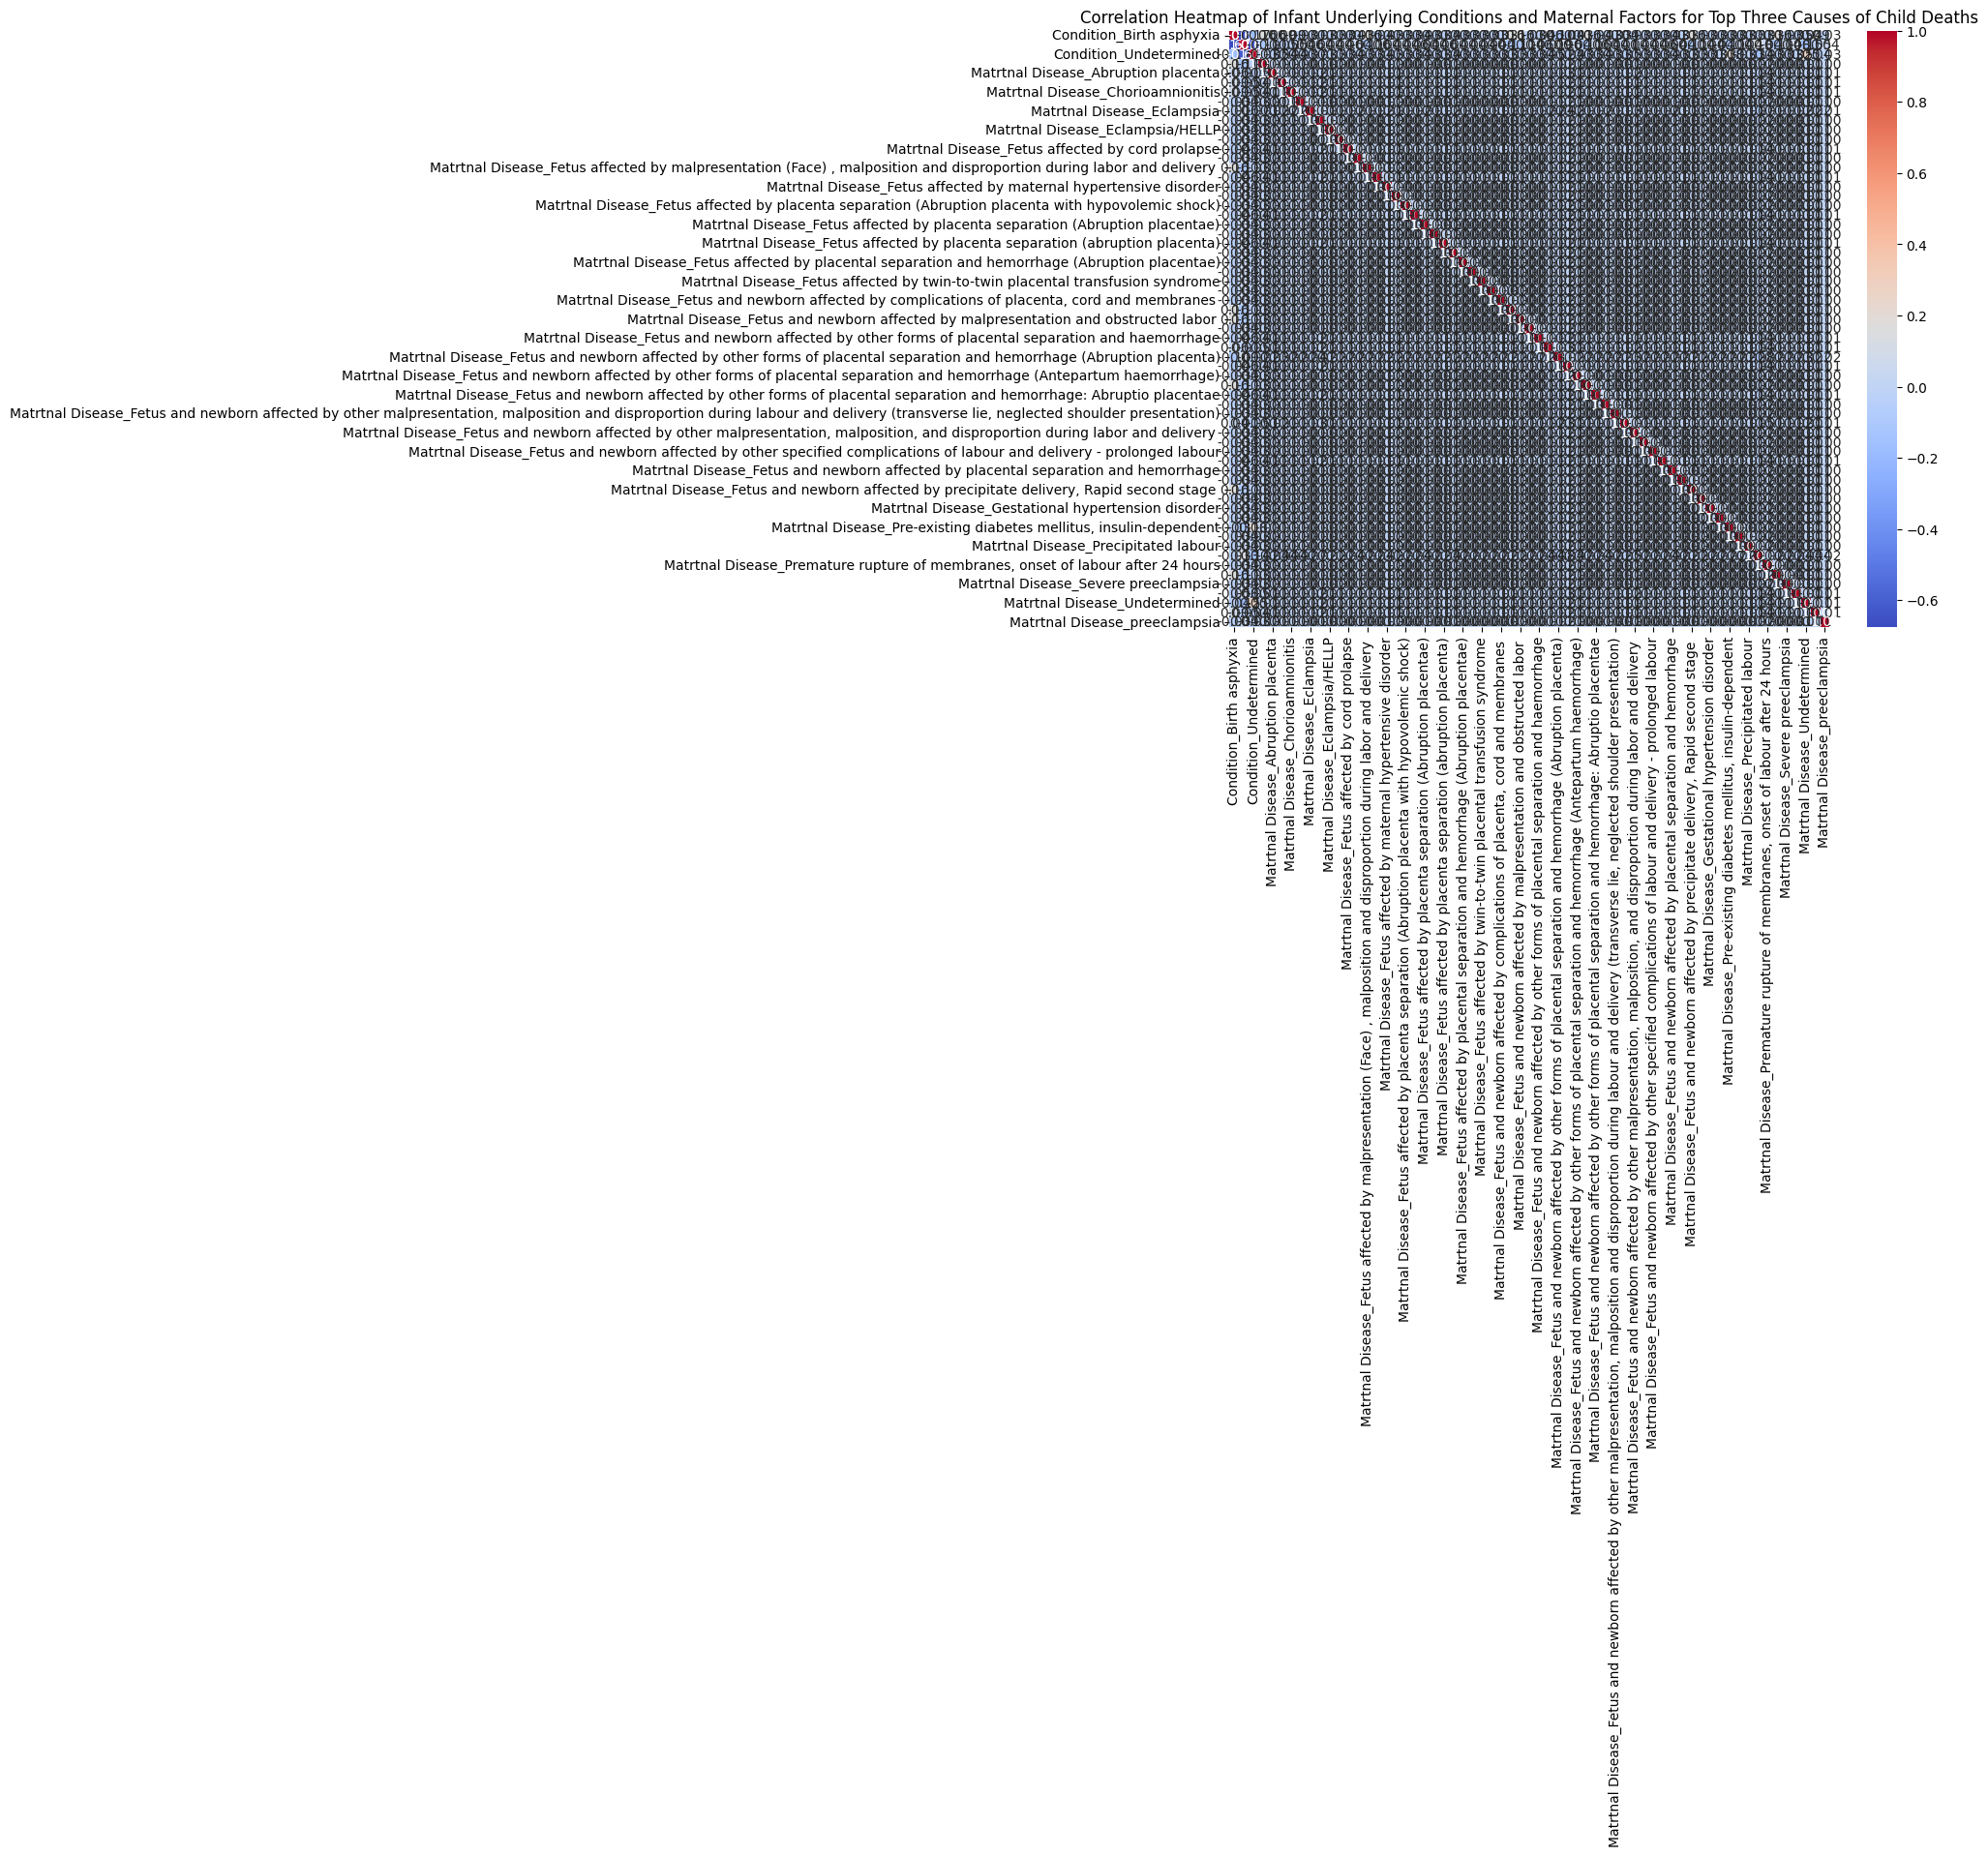

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt



top_three_causes = data['Condition'].value_counts().nlargest(3).index.tolist()
filtered_data = data[data['Condition'].isin(top_three_causes)]
filtered_data = filtered_data[['Condition', 'Matrtnal Disease']]

# Convert categorical variables to numerical using one-hot encoding
filtered_data = pd.get_dummies(filtered_data)

# Calculate correlation matrix
correlation_matrix = filtered_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Infant Underlying Conditions and Maternal Factors for Top Three Causes of Child Deaths')
plt.show()
